In [15]:
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 5. Implementar una función que estime una integral a través de una regla de trapecios
compuesta. Debe recibir la función a integrar, el intervalo de integración y el número de intervalos
de la partición.

In [16]:
inicio = 0
final = 1
n = 10000

def funcionA(x):
    return x**2

def regla_trapecios(funcion, inicio, final, n):
    discreta = np.arange(inicio, final, (final - inicio) / n)
    suma = -funcion(inicio) - funcion(final) + np.sum(funcion(discreta)) * 2
    total = ((final - inicio) / (2 * n)) * suma
    return total

print(regla_trapecios(funcionA, inicio, final, n))

0.333233335


Ejercicio 6. Probar el algoritmo del ejercicio anterior integrando la funci´on f (x) = e−x2
cuya
integral en toda la recta es √π.

In [17]:
funcion2 = lambda x:np.e**(-x**2)
print(regla_trapecios(funcion2, inicio, final, n))

0.7467873442551775


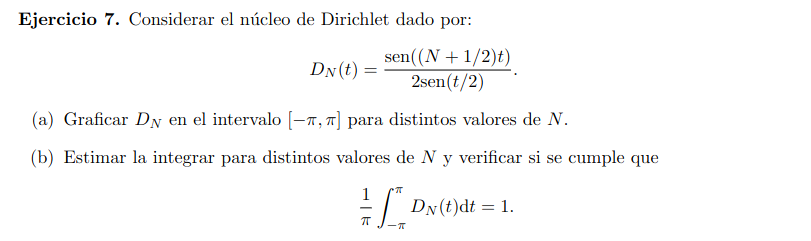

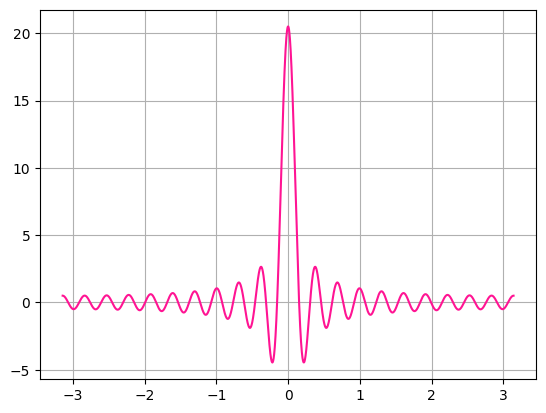

In [35]:
N = 20
t = np.linspace(-np.pi, np.pi, 5000)

def dirichlet(t, N):
  return (np.sin((N+0.5)*t))/(2 * np.sin(t/2))

plt.plot(t, dirichlet(t, N), color = "deeppink")
plt.grid()
plt.show()

In [36]:
def regla_trapecios2(funcion, inicio, final, n, args = []):
    discreta = np.arange(inicio, final, (final - inicio) / n)
    suma = -funcion(inicio, *args) - funcion(final, *args) + np.sum(funcion(discreta, *args)) * 2
    total = ((final - inicio) / (2 * n)) * suma
    return total

integral_dirichlet = regla_trapecios2(dirichlet, -np.pi, np.pi, 1000, [3])
print((1/np.pi) * integral_dirichlet)

1.0009999999999832


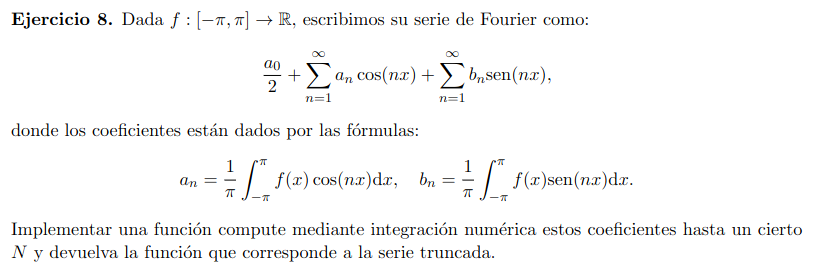

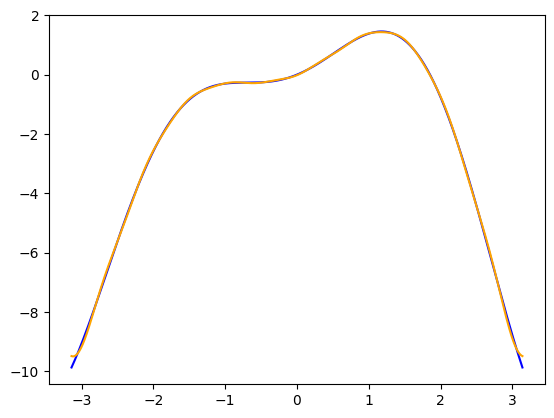

In [37]:
# Definir la regla de los trapecios
def regla_trapecios(funcion, inicio, final, n):
    h = (final - inicio) / n
    x = np.linspace(inicio, final, n+1)
    y = funcion(x)
    return (h/2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

# Definir la función de coeficientes de Fourier
def coeficientes_fourier(f, n):
    a0 = (1/np.pi) * regla_trapecios(f, -np.pi, np.pi, 1000)
    a = [(1/np.pi) * regla_trapecios(lambda x: f(x) * np.cos(k*x), -np.pi, np.pi, 1000) for k in range(1, n+1)]
    b = [(1/np.pi) * regla_trapecios(lambda x: f(x) * np.sin(k*x), -np.pi, np.pi, 1000) for k in range(1, n+1)]
    return a0, a, b

# Definir la función de la serie de Fourier truncada
def serie_fourier_truncada(f, n, t):
    a0, a, b = coeficientes_fourier(f, n)
    res = a0 / 2
    for k in range(1, n+1):
        res += a[k-1] * np.cos(k*t) + b[k-1] * np.sin(k*t)
    return res

f = lambda t: np.sin(t) + np.cos(t) * t**2
#print(serie_fourier_truncada(f, 10, t))

plt.plot(t, f(t), color='blue')
plt.plot(t, serie_fourier_truncada(f, 10, t), color='orange')
plt.show()

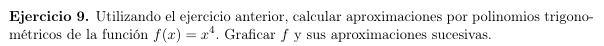

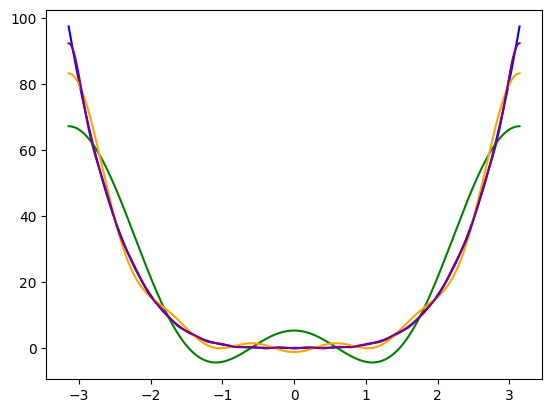

In [20]:
f = lambda t: t**4
#print("Serie truncada: ", serie_fourier_truncada(f, 10, t))

plt.plot(t, f(t), color='blue')
plt.plot(t, serie_fourier_truncada(f, 2, t), color='green')
plt.plot(t, serie_fourier_truncada(f, 5, t), color='orange')
plt.plot(t, serie_fourier_truncada(f, 15, t), color='purple')
plt.show()

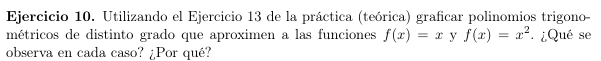

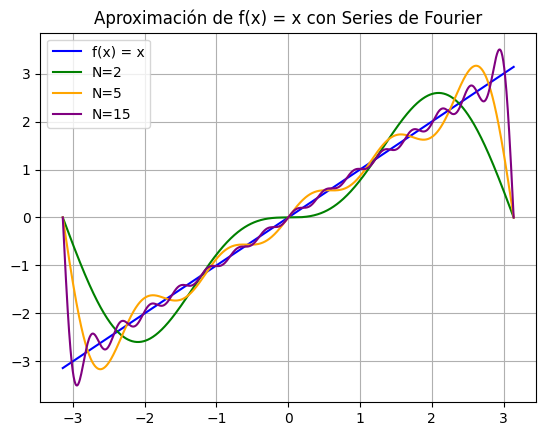

In [21]:
f_10a = lambda t: t
t = np.linspace(-np.pi, np.pi, 1000)

# Graficar la función original y las aproximaciones
plt.plot(t, f_10a(t), label='f(x) = x', color='blue')
plt.plot(t, serie_fourier_truncada(f_10a, 2, t), label='N=2', color='green')
plt.plot(t, serie_fourier_truncada(f_10a, 5, t), label='N=5', color='orange')
plt.plot(t, serie_fourier_truncada(f_10a, 15, t), label='N=15', color='purple')
plt.legend()
plt.title('Aproximación de f(x) = x con Series de Fourier')
plt.grid(True)
plt.show()

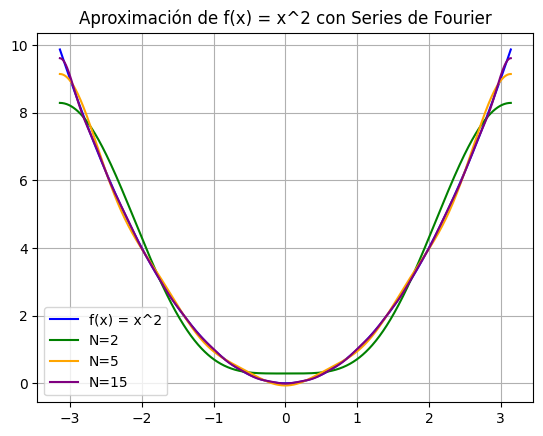

In [22]:
f_10b = lambda t: t**2
t = np.linspace(-np.pi, np.pi, 1000)

# Graficar la función original y las aproximaciones
plt.plot(t, f_10b(t), label='f(x) = x^2', color='blue')
plt.plot(t, serie_fourier_truncada(f_10b, 2, t), label='N=2', color='green')
plt.plot(t, serie_fourier_truncada(f_10b, 5, t), label='N=5', color='orange')
plt.plot(t, serie_fourier_truncada(f_10b, 15, t), label='N=15', color='purple')
plt.legend()
plt.title('Aproximación de f(x) = x^2 con Series de Fourier')
plt.grid(True)
plt.show()

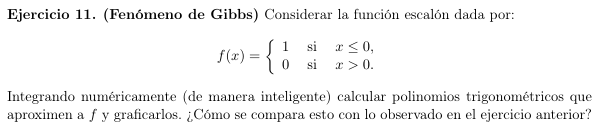

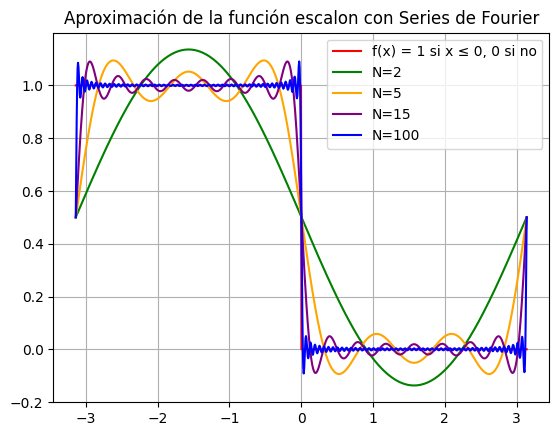

In [39]:
def funcion_escalon(t):
  res = []
  for i in range(len(t)):
    if t[i] <= 0:
      res.append(1)
    else:
      res.append(0)
  return res

t = np.linspace(-np.pi, np.pi, 1000)

plt.plot(t, funcion_escalon(t), label='f(x) = 1 si x ≤ 0, 0 si no', color='red')
plt.plot(t, serie_fourier_truncada(funcion_escalon, 2, t), label='N=2', color='green')
plt.plot(t, serie_fourier_truncada(funcion_escalon, 5, t), label='N=5', color='orange')
plt.plot(t, serie_fourier_truncada(funcion_escalon, 15, t), label='N=15', color='purple')
plt.plot(t, serie_fourier_truncada(funcion_escalon, 100, t), label='N=100', color='blue')
#plt.plot(t, serie_fourier_truncada(funcion_escalon, 1000, t), label='N=1000', color='black') #Presenta error numér
plt.legend()
plt.title('Aproximación de la función escalon con Series de Fourier')
plt.grid(True)
plt.show()

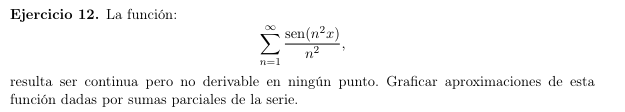

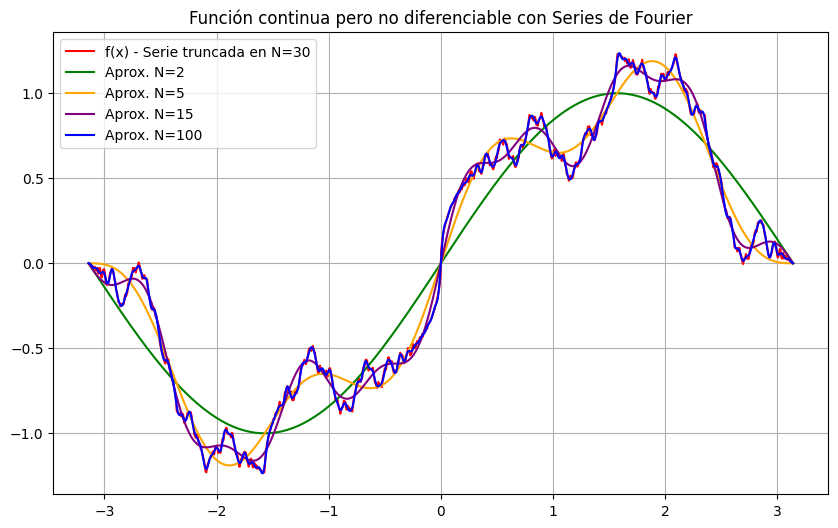

In [41]:
def funcion_12(x, k):
    suma = np.zeros_like(x)
    for n in range(1, k+1):
        suma += np.sin(n ** 2 * x) / n**2
    return suma

x = np.linspace(-np.pi, np.pi, 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, funcion_12(x, 30), label='f(x) - Serie truncada en N=30', color='red')
plt.plot(x, serie_fourier_truncada(lambda t: funcion_12(t, 30), 2, x), label='Aprox. N=2', color='green')
plt.plot(x, serie_fourier_truncada(lambda t: funcion_12(t, 30), 5, x), label='Aprox. N=5', color='orange')
plt.plot(x, serie_fourier_truncada(lambda t: funcion_12(t, 30), 15, x), label='Aprox. N=15', color='purple')
plt.plot(x, serie_fourier_truncada(lambda t: funcion_12(t, 30), 100, x), label='Aprox. N=100', color='blue')
#plt.plot(x, serie_fourier_truncada(lambda t: funcion_12(t, 30), 200, x), label='Aprox. N=1000', color='black')
plt.legend()
plt.title('Función continua pero no diferenciable con Series de Fourier')
plt.grid(True)
plt.show()